#### 聚类的算法和参数选择

+ 随机生成属于3个簇的100个样本
+ 将样本随机指派到2个簇，计算Davies-Bouldin Index
+ 使用AGNES算法聚类，聚类数分别设置为$k=2,3,4$
+ 使用k-means算法聚类，聚类数分别设置为$k=2,3,4,5$
+ 计算所有聚类结果的Davies-Bouldin Index

**Davies-Bouldin Index**
+ DBI是一种聚类结果度量的内部指标，令聚类结果的簇划分为$\mathcal{C}=\{C_1,\cdots,C_k\}$
+ 定义：
    - 聚类$C$的样本平均距离：
    $$ \text{avg}(C) = \frac{2}{|C|(|C|-1)}\sum_{1\le i<j \le |C|}{\text{dist}(\mathbf{x}_i,\mathbf{x}_j)}$$
    - 聚类$C_i$和$C_j$的中心距离：
    $$ d_{\text{cen}}(C_i,C_j) = \text{dist}(\boldsymbol{\mu}_i,\boldsymbol{\mu}_j) $$
    - Davies-Bouldin Index：
    $$ DBI = \frac{1}{k} \sum_{i=1}^k{\max_{j\neq i}{\left( \frac{\text{avg}(C_i)+\text{avg}(C_j)}{d_{\text{cen}}(C_i,C_j)} \right)}} $$

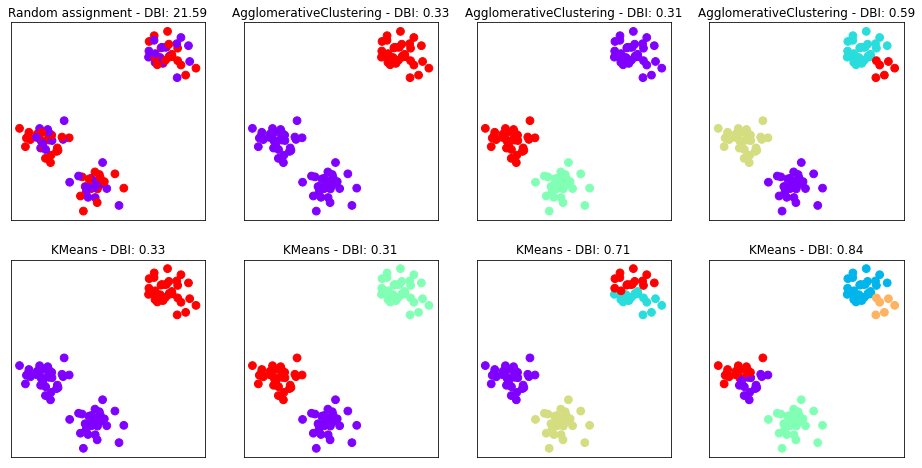

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import davies_bouldin_score

X, y = make_blobs(random_state=1)

fig, axes = plt.subplots(2, 4, figsize=(16, 8), subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [ AgglomerativeClustering(n_clusters=2), AgglomerativeClustering(n_clusters=3), 
               AgglomerativeClustering(n_clusters=4), KMeans(n_clusters=2), KMeans(n_clusters=3), 
               KMeans(n_clusters=4), KMeans(n_clusters=5)]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0,0].scatter(X[:,0], X[:,1], c=random_clusters,cmap='rainbow', s=60)
axes[0,0].set_title("Random assignment - DBI: %3.2f" %(davies_bouldin_score(X, random_clusters)))

for ax, algorithm in zip(axes.reshape(8,1)[1:8], algorithms):
    clusters = algorithm.fit_predict(X)
    ax[0].scatter(X[:,0], X[:,1], c=clusters,cmap='rainbow', s=60)
    ax[0].set_title("%s - DBI: %3.2f" %(algorithm.__class__.__name__,davies_bouldin_score(X, clusters)))

plt.show()